In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [5]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,
                 train_size=0.8,
                 test_size=0.2,
                 random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


In [6]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [7]:
clf.fit(X_train, y_train)

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
clf.score(X_test, y_test)

0.956140350877193

In [9]:
y_pred = clf.predict(X_test)


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [11]:
accuracy_score(y_test, y_pred)

0.956140350877193

In [12]:
cmat = confusion_matrix(y_test, y_pred)
cmat

array([[46,  1],
       [ 4, 63]], dtype=int64)

In [14]:
clf.decision_function(X_test[12:15])

array([ 5.52248881, -1.16574602,  1.40582404])

In [15]:
clf.predict(X_test[12:15])

array([1, 0, 1])

In [16]:
(clf.decision_function(X_test[12:15]) > 0).astype(int)

array([1, 0, 1])

In [17]:
(clf.decision_function(X_test[12:15]) > 0.5).astype(int) * 2 - 1

array([ 1, -1,  1])

In [18]:
y_test[12:15]

array([1, 1, 1])

In [19]:
(clf.decision_function(X_test[12:15]) > -2).astype(int)

array([1, 1, 1])

In [20]:
(clf.decision_function(X_test[12:15]) > 2).astype(int)

array([1, 0, 0])

In [22]:
for th in range(-3,7):
    print(th, (clf.decision_function(X_test[12:15]) > th).astype(int))

-3 [1 1 1]
-2 [1 1 1]
-1 [1 0 1]
0 [1 0 1]
1 [1 0 1]
2 [1 0 0]
3 [1 0 0]
4 [1 0 0]
5 [1 0 0]
6 [0 0 0]


In [23]:
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve

import matplotlib.pyplot as plt
%matplotlib inline

AUC =  0.9942838996506828


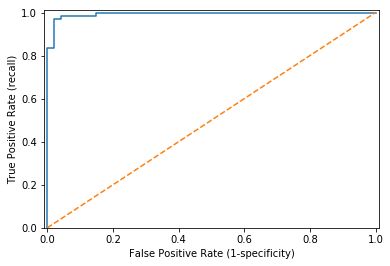

In [24]:
test_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, test_score)

plt.plot(fpr, tpr)
print("AUC = ", auc(fpr, tpr))

plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.ylabel('True Positive Rate (recall)')
plt.xlabel('False Positive Rate (1-specificity)');

Text(0, 0.5, 'Precision')

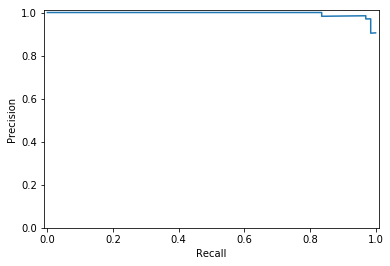

In [25]:
test_score = clf.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, test_score)

plt.plot(recall, precision)

plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')